In [1]:
from backtester_socket import Socket
import pandas as pd

In [2]:
client = Socket("localhost", 10157)
client.connect()

Socket created for IP localhost and port 10157
Connected to localhost on port 10157


## Sample strategy with sending random orders


In [3]:
import random
tradelength = 20
n_orders = []
order_history = []
for i in range(20):
    stock,option = client.get_data()
    orders = {"contractID":[],
             "size":[],
             "action": []}
    new = random.randint(1,10)
    n_orders.append(new)
    for k in range(new):
        row = option.sample()
        action = random.randint(0,1)
        orders["contractID"].append(row["contractID"].iloc[0])
        if action==1:
            orders["action"].append("B")
        else:
            orders["action"].append("S")
        orders["size"].append(1)
    df_orders = pd.DataFrame(orders)
    order_history.append(orders)
    client.send_orders(df_orders)
client.close()

In [4]:
print(n_orders)

[10, 6, 6, 6, 5, 1, 5, 2, 1, 2, 3, 8, 5, 4, 8, 1, 3, 10, 10, 4]


In [6]:
print(f"Total # of orders sent: {sum(n_orders)}")

Total # of orders sent: 100


In [8]:
order_logs = pd.read_csv("logs/sessions/20250119_173024.csv")

In [9]:
order_logs.head()

,step,contractID,size,action,status,capital,portfolio value,pnl
0,0,IBM250321P00240000,1,S,Success,10016.1,-17.55,-1.45020
1,1,IBM260116C00130000,1,B,Success,9911.2,84.35,-4.45117
2,2,IBM250417C00105000,1,B,Success,9781.2,210.25,-8.55078
3,3,IBM250718P00240000,1,S,Success,9801.8,187.10,-11.10160
4,4,IBM270115P00230000,1,B,Success,9773.0,215.05,-11.95120


In [10]:
order_logs.tail()

,step,contractID,size,action,status,capital,portfolio value,pnl
95,9,IBM250718C00265000,1,B,Success,9035.13,763.22,-201.649
96,0,IBM270115C00350000,1,S,Success,9040.93,764.07,-194.999
97,1,IBM270115P00120000,1,S,Success,9043.04,760.87,-196.089
98,2,IBM250124C00207500,1,S,Success,9059.19,743.32,-197.488
99,3,IBM250124C00250000,1,S,Success,9059.20,742.92,-197.879


<Axes: >

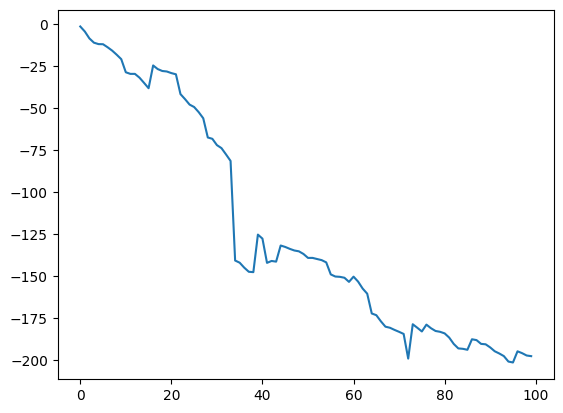

In [14]:
import matplotlib as plt
order_logs["pnl"].plot()